In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [25]:
df = pd.read_csv("iris.csv")
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [26]:
df.isna().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [27]:
features=['sepal.length','sepal.width','petal.length','petal.width']
label='variety'

In [28]:
df[features].head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Train / Test split

In [29]:
X=df[features]
y=df['variety']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

X_train.shape, X_test.shape

((120, 4), (30, 4))

# Training

In [30]:
model = DecisionTreeClassifier(max_depth=None)
clf = model.fit(X_train, y_train)
clf

DecisionTreeClassifier()

In [32]:
predictions = model.predict(X_test)

# Confusion Matrix

In [33]:
confusion_matrix(y_test, predictions)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

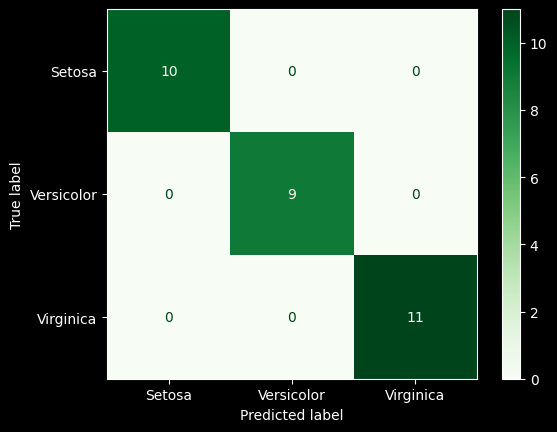

In [45]:
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
disp.plot(cmap="Greens")
plt.show()

In [35]:
accuracy_score(y_test, predictions) * 100

100.0

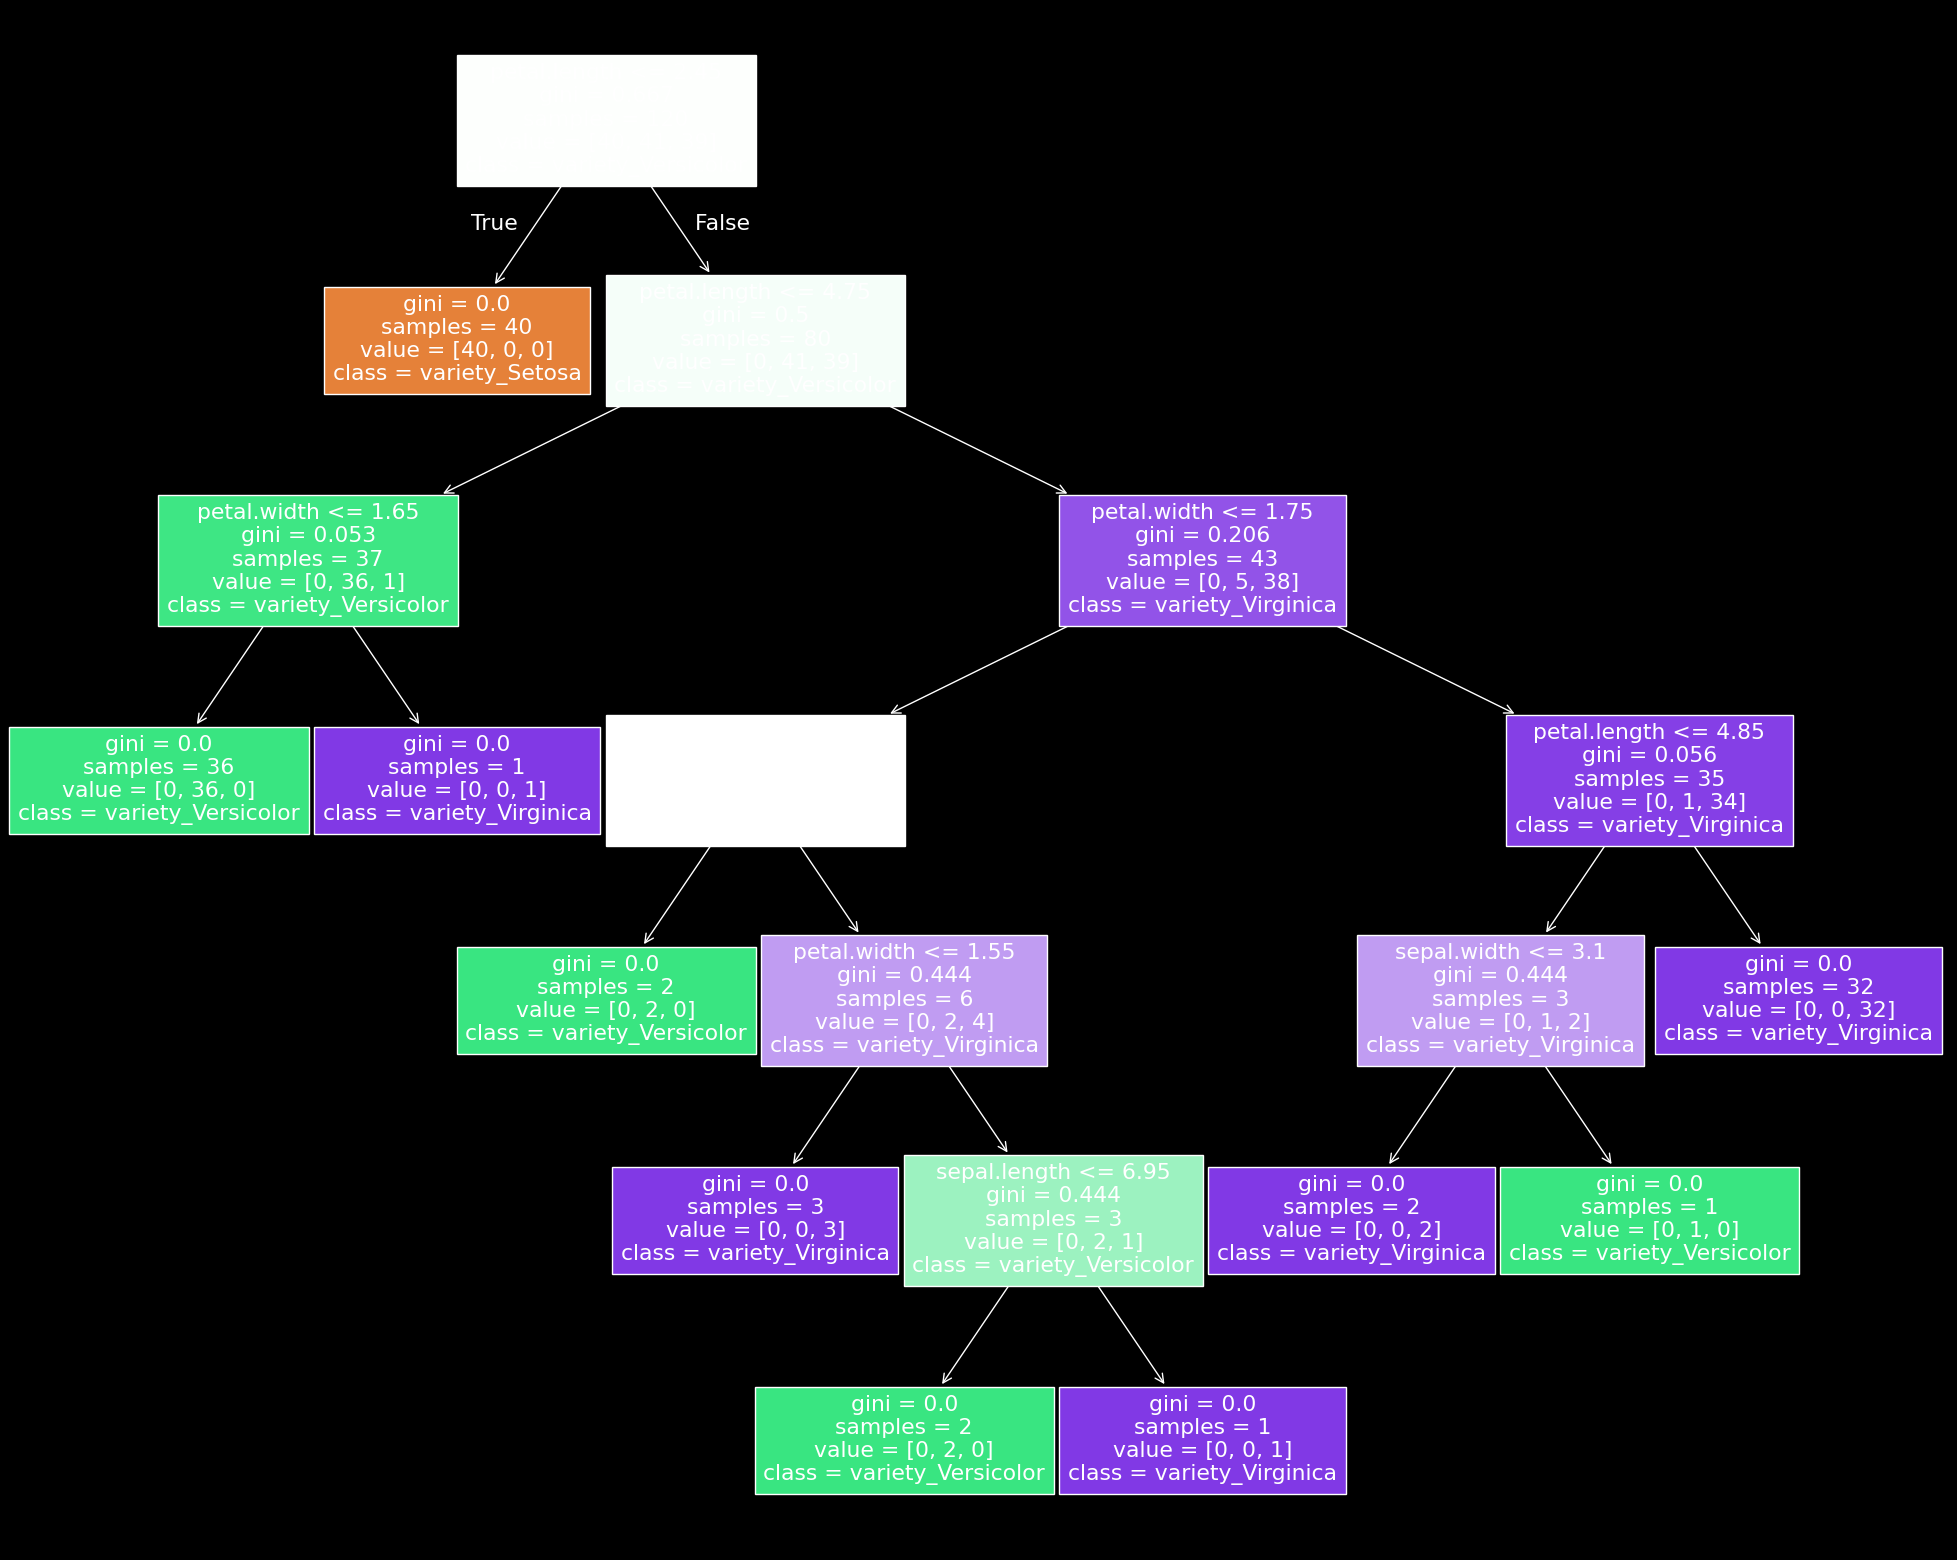

In [38]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(clf, 
                   feature_names=features,  
                   class_names=['variety_Setosa','variety_Versicolor','variety_Virginica'],
                   filled=True)

In [40]:
from sklearn.metrics import f1_score
f1_score(y_test, predictions, average='weighted')

1.0

# feature importance

In [41]:
feature_importances = clf.feature_importances_
feature_importances

array([0.01667014, 0.01667014, 0.88947325, 0.07718647])

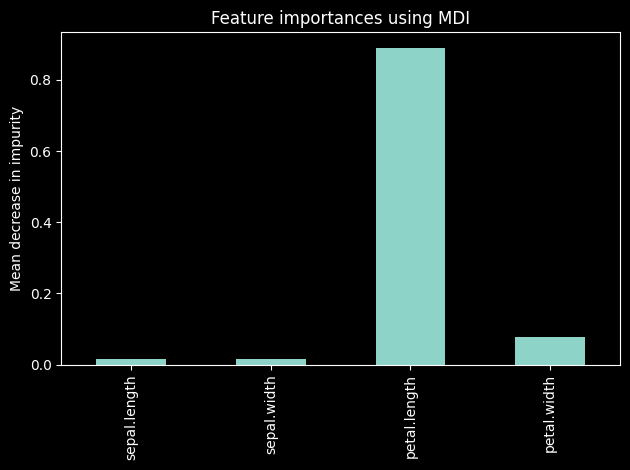

In [44]:
series = pd.Series(feature_importances, index=features)

fig, ax = plt.subplots()
series.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()